<a href="https://colab.research.google.com/github/Akita20/Practice/blob/master/LeNet_5_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5 Model

## Problem Statement: Handwritten Digit Recognition using LeNet-5 CNN

### Objective
Develop a Convolutional Neural Network (CNN) model to accurately recognize handwritten digits from the MNIST dataset.

### Dataset
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0 to 9), divided into 60,000 training images and 10,000 test images. Each image has a size of 28x28 pixels.




### Model
The LeNet-5 model is used for this task. It comprises two convolutional layers, two average pooling layers, and three fully connected layers. The activation function used is the hyperbolic tangent (tanh) for the hidden layers, while the softmax activation function is used for the output layer.


### Training
The model is trained using the **Adam optimizer** and **categorical cross-entropy** loss function. The training is performed for 5 epochs with a batch size of 64.

### Evaluation
The model's performance is evaluated on the test dataset, and the accuracy is reported.

### Expected Outcome
A trained LeNet-5 CNN model capable of effectively recognizing handwritten digits from the MNIST dataset with high accuracy.


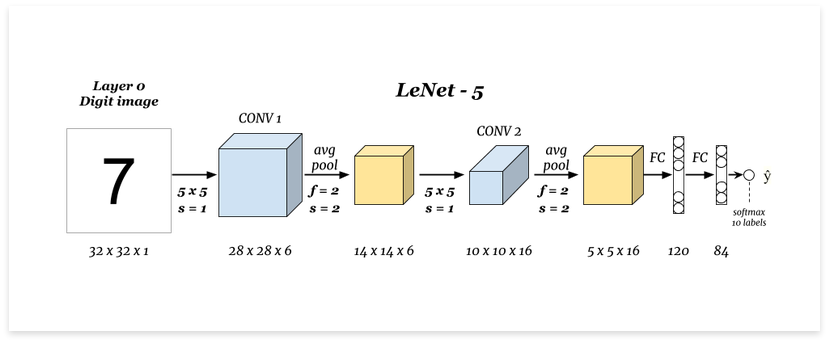

In [1]:
%%time
import tensorflow as tf
from tensorflow.keras import layers

# create the LeNet-5 model
model = tf.keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# make prediction using the trained model
predicted_classes = model.predict(x_test)
predicted_classes = tf.argmax(predicted_classes, axis=1).numpy()

# print the prediction output
print("Predicted classes:", predicted_classes)

# evaluate the accuracy of the model
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 29s 14ms/step - loss: 0.2169 - accuracy: 0.9465 - val_loss: 0.0654 - val_accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0611 - val_accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0477 - val_accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 2s 5ms/step
Predicted classes: [7 2 1 ... 4 5 6]
Test Accuracy: 0.9872000217437744
CPU times: user 3min 20s, sys: 6.12 s, total: 3min 26s
Wall time: 2min 18s



This code starts by defining the LeNet-5 architecture and compiling the model using an optimizer, loss function, and metrics. We then train the model on the MNIST dataset and evaluate its accuracy.

We then use the trained model to make predictions on the test dataset using the `predict()` function. We extract the predicted classes by taking the argmax of the output, and convert the output tensor to a numpy array using the `.numpy()` method. Finally,

https://www.philschmid.de/getting-started-with-cnn-by-calculating-lenet-layer-manually